In [2]:
import numpy as np
import numpy.linalg as la
import pickle
import matplotlib.pyplot as plt
from scipy.io import mmread

## Sequential Analysis

In [14]:
seq_cgs_t_A = [16.427660987, 16.435311229, 16.389685029, 16.389543915, 16.362283613]
seq_cgs_err_A = 5.317218788326484e-15

seq_cgs_t_C = [17.447163338, 17.468355521, 17.46603897, 17.478243611, 17.456877465]
seq_cgs_err_C = 457.115234349992

In [15]:
seq_cho_t_A = [1.314468254, 1.303895816, 1.300421361, 1.294139456, 1.3040185229999999]
seq_cho_err_A = 5.3150494568645054e-15

In [16]:
seq_hous_t_A = [4.695521912, 4.716499537, 4.703960693, 4.708552138, 4.700744274]
seq_hous_err_A = 5.196973623548411e-15

seq_hous_t_C = [6.2856545520000005, 5.944208619, 5.96120797, 5.915232039, 5.901667206]
seq_hous_err_C = 1.7362139945352895e-14

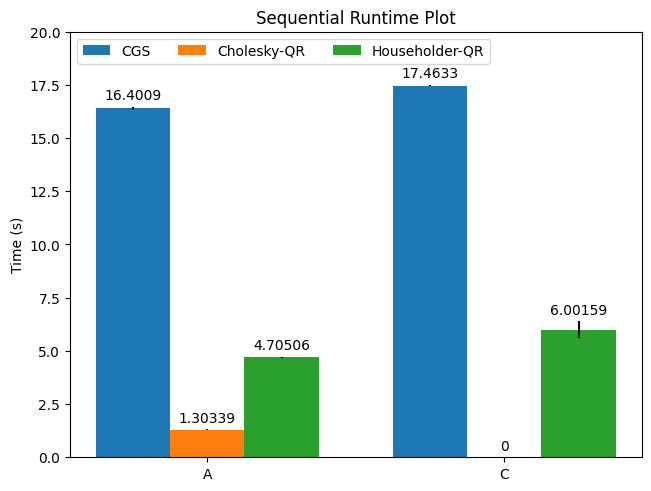

In [17]:
datasets = ("A", "C")

mean_grades = {
    "CGS" : (np.mean(seq_cgs_t_A), np.mean(seq_cgs_t_C)),
    "Cholesky-QR" : (np.mean(seq_cho_t_A), 0),
    "Householder-QR" : (np.mean(seq_hous_t_A), np.mean(seq_hous_t_C)),
}
std_errs = {
    "CGS" : (max(seq_cgs_t_A)-min(seq_cgs_t_A), max(seq_cgs_t_C)-min(seq_cgs_t_C)),
    "Cholesky-QR" : (max(seq_cho_t_A)-min(seq_cho_t_A), 0),
    "Householder-QR" : (max(seq_hous_t_A)-min(seq_hous_t_A), max(seq_hous_t_C)-min(seq_hous_t_C)),
}

# Plot the results
x = np.arange(len(datasets))
width = 0.25
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in mean_grades.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, yerr=std_errs[attribute], label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1 

ax.set_ylabel('Time (s)')
ax.set_title('Sequential Runtime Plot')
ax.set_xticks(x + width, datasets)
ax.legend(loc='upper left', ncols=len(mean_grades))
ax.set_ylim(0, 20)

plt.show()

In [ ]:
with open("A_Exp_test.pkl", "rb") as f:
    results = pickle.load(f)



array([6.10515873e-313, 5.52417606e-313, 4.99848120e-313, 4.52281283e-313,
       4.09241028e-313, 3.70296595e-313, 3.35058215e-313, 3.03173210e-313,
       2.74322465e-313, 2.48217231e-313, 2.24596238e-313, 2.03223080e-313,
       1.83883847e-313, 1.66384986e-313, 1.50551361e-313, 1.36224505e-313,
       1.23261029e-313, 1.11531191e-313, 1.00917595e-313, 9.13140161e-314,
       8.26243386e-314, 7.47615932e-314, 6.76470870e-314, 6.12096155e-314,
       5.53847504e-314, 5.01141946e-314, 4.53451984e-314, 4.10300323e-314,
       3.71255085e-314, 3.35925492e-314, 3.03957955e-314, 2.75032531e-314,
       2.48859725e-314, 2.25177591e-314, 2.03749110e-314, 1.84359819e-314,
       1.66815663e-314, 1.50941053e-314, 1.36577113e-314, 1.23580082e-314,
       1.11819883e-314, 1.01178814e-314, 9.15503767e-315, 8.28382065e-315,
       7.49551089e-315, 6.78221872e-315, 6.13680528e-315, 5.55281104e-315,
       5.02439120e-315, 4.54625716e-315, 4.11362360e-315, 3.72216055e-315,
       3.36795014e-315, 3

## Parallel Analysis

### Exponential Matrix

In [4]:
Exp_1_50_G = [2.097232981, 1.950085466, 1.954903672]
Exp_1_100_G = [2.161884696, 2.146220301, 2.146620458]
Exp_1_150_G = [2.400904012, 2.386321711, 2.396913713]
Exp_1_200_G = [2.643701408, 2.654855527, 2.638019235]

Exp_4_50_G = [2.374551113, 2.389672288, 2.617448576]
Exp_4_100_G = [2.563201752, 2.268587662, 2.432585481]
Exp_4_150_G = [2.820021177, 2.865827951, 2.783600218]
Exp_4_200_G = [3.429951235, 3.24413133, 3.008283955]

Exp_16_50_G = [2.189079917, 2.177940289, 2.18237556]
Exp_16_100_G = [2.307065308, 2.313325743, 2.30711732]
Exp_16_150_G = [2.485574175, 2.481599565, 2.476552121]
Exp_16_200_G = [2.669965126, 2.67395653, 2.679445989]

Exp_64_50_G = [2.100645275, 2.099595832, 2.10505944]
Exp_64_100_G = [2.191440365, 2.191802424, 2.19644841]
Exp_64_150_G = [2.33244405, 2.337343432, 2.338168428]
Exp_64_200_G = [2.494926742, 2.502133186, 2.499192755]

Exp_1_50_G_mean, Exp_1_50_G_min, Exp_1_50_G_max = np.mean(Exp_1_50_G), min(Exp_1_50_G), max(Exp_1_50_G)
Exp_1_100_G_mean, Exp_1_100_G_min, Exp_1_100_G_max = np.mean(Exp_1_100_G), min(Exp_1_100_G), max(Exp_1_100_G)
Exp_1_150_G_mean, Exp_1_150_G_min, Exp_1_150_G_max = np.mean(Exp_1_150_G), min(Exp_1_150_G), max(Exp_1_150_G)
Exp_1_200_G_mean, Exp_1_200_G_min, Exp_1_200_G_max = np.mean(Exp_1_200_G), min(Exp_1_200_G), max(Exp_1_200_G)

Exp_4_50_G_mean, Exp_4_50_G_min, Exp_4_50_G_max = np.mean(Exp_4_50_G), min(Exp_4_50_G), max(Exp_4_50_G)
Exp_4_100_G_mean, Exp_4_100_G_min, Exp_4_100_G_max = np.mean(Exp_4_100_G), min(Exp_4_100_G), max(Exp_4_100_G)
Exp_4_150_G_mean, Exp_4_150_G_min, Exp_4_150_G_max = np.mean(Exp_4_150_G), min(Exp_4_150_G), max(Exp_4_150_G)
Exp_4_200_G_mean, Exp_4_200_G_min, Exp_4_200_G_max = np.mean(Exp_4_200_G), min(Exp_4_200_G), max(Exp_4_200_G)

Exp_16_50_G_mean, Exp_16_50_G_min, Exp_16_50_G_max = np.mean(Exp_16_50_G), min(Exp_16_50_G), max(Exp_16_50_G)
Exp_16_100_G_mean, Exp_16_100_G_min, Exp_16_100_G_max = np.mean(Exp_16_100_G), min(Exp_16_100_G), max(Exp_16_100_G)
Exp_16_150_G_mean, Exp_16_150_G_min, Exp_16_150_G_max = np.mean(Exp_16_150_G), min(Exp_16_150_G), max(Exp_16_150_G)
Exp_16_200_G_mean, Exp_16_200_G_min, Exp_16_200_G_max = np.mean(Exp_16_200_G), min(Exp_16_200_G), max(Exp_16_200_G)

Exp_64_50_G_mean, Exp_64_50_G_min, Exp_64_50_G_max = np.mean(Exp_64_50_G), min(Exp_64_50_G), max(Exp_64_50_G)
Exp_64_100_G_mean, Exp_64_100_G_min, Exp_64_100_G_max = np.mean(Exp_64_100_G), min(Exp_64_100_G), max(Exp_64_100_G)
Exp_64_150_G_mean, Exp_64_150_G_min, Exp_64_150_G_max = np.mean(Exp_64_150_G), min(Exp_64_150_G), max(Exp_64_150_G)
Exp_64_200_G_mean, Exp_64_200_G_min, Exp_64_200_G_max = np.mean(Exp_64_200_G), min(Exp_64_200_G), max(Exp_64_200_G)

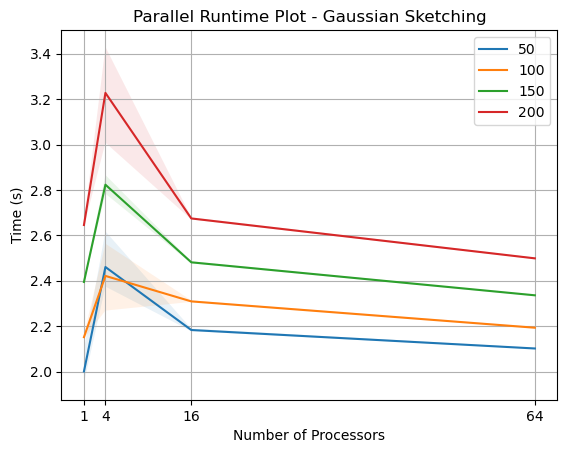

In [10]:
plt.plot([1, 4, 16, 64], [Exp_1_50_G_mean, Exp_4_50_G_mean, Exp_16_50_G_mean, Exp_64_50_G_mean], label="50")
plt.plot([1, 4, 16, 64], [Exp_1_100_G_mean, Exp_4_100_G_mean, Exp_16_100_G_mean, Exp_64_100_G_mean], label="100")
plt.plot([1, 4, 16, 64], [Exp_1_150_G_mean, Exp_4_150_G_mean, Exp_16_150_G_mean, Exp_64_150_G_mean], label="150")
plt.plot([1, 4, 16, 64], [Exp_1_200_G_mean, Exp_4_200_G_mean, Exp_16_200_G_mean, Exp_64_200_G_mean], label="200")

plt.fill_between([1, 4, 16, 64], [Exp_1_50_G_min, Exp_4_50_G_min, Exp_16_50_G_min, Exp_64_50_G_min], [Exp_1_50_G_max, Exp_4_50_G_max, Exp_16_50_G_max, Exp_64_50_G_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Exp_1_100_G_min, Exp_4_100_G_min, Exp_16_100_G_min, Exp_64_100_G_min], [Exp_1_100_G_max, Exp_4_100_G_max, Exp_16_100_G_max, Exp_64_100_G_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Exp_1_150_G_min, Exp_4_150_G_min, Exp_16_150_G_min, Exp_64_150_G_min], [Exp_1_150_G_max, Exp_4_150_G_max, Exp_16_150_G_max, Exp_64_150_G_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Exp_1_200_G_min, Exp_4_200_G_min, Exp_16_200_G_min, Exp_64_200_G_min], [Exp_1_200_G_max, Exp_4_200_G_max, Exp_16_200_G_max, Exp_64_200_G_max], alpha=0.1)

plt.xlabel("Number of Processors")
plt.ylabel("Time (s)")
plt.title("Parallel Runtime Plot - Gaussian Sketching")
plt.xticks([1, 4, 16, 64])
plt.grid()
plt.legend()
plt.show()

In [8]:
Exp_1_50_S = [2.346779291, 2.320621484, 2.302257309]
Exp_1_100_S = [2.85001338, 2.692967193, 2.638929731]
Exp_1_150_S = [2.968580532, 2.956281645, 3.000839781]
Exp_1_200_S = [3.475048792, 3.475104758, 3.488678891]

Exp_4_50_S = [2.753307225, 2.639393465, 2.749031477]
Exp_4_100_S = [2.978090394, 3.005389315, 3.010173816]
Exp_4_150_S = [3.078086546, 2.772115624, 3.195992263]
Exp_4_200_S = [3.244131926, 3.009320459, 3.133769513]

Exp_16_50_S = [2.359143258, 2.363569778, 2.348933228]
Exp_16_100_S = [2.397766826, 2.393672165, 2.390061719]
Exp_16_150_S = [2.538315045, 2.515752197, 2.537196161]
Exp_16_200_S = [2.730997315, 2.737470718, 2.721897594]

Exp_64_50_S = [2.240723422, 2.243764733, 2.249465551]
Exp_64_100_S = [2.249835708, 2.244572238, 2.249869845]
Exp_64_150_S = [2.338895461, 2.343065313, 2.33888505]
Exp_64_200_S = [2.511355308, 2.512947962, 2.503216754]

Exp_1_50_S_mean, Exp_1_50_S_min, Exp_1_50_S_max = np.mean(Exp_1_50_S), min(Exp_1_50_S), max(Exp_1_50_S)
Exp_1_100_S_mean, Exp_1_100_S_min, Exp_1_100_S_max = np.mean(Exp_1_100_S), min(Exp_1_100_S), max(Exp_1_100_S)
Exp_1_150_S_mean, Exp_1_150_S_min, Exp_1_150_S_max = np.mean(Exp_1_150_S), min(Exp_1_150_S), max(Exp_1_150_S)
Exp_1_200_S_mean, Exp_1_200_S_min, Exp_1_200_S_max = np.mean(Exp_1_200_S), min(Exp_1_200_S), max(Exp_1_200_S)

Exp_4_50_S_mean, Exp_4_50_S_min, Exp_4_50_S_max = np.mean(Exp_4_50_S), min(Exp_4_50_S), max(Exp_4_50_S)
Exp_4_100_S_mean, Exp_4_100_S_min, Exp_4_100_S_max = np.mean(Exp_4_100_S), min(Exp_4_100_S), max(Exp_4_100_S)
Exp_4_150_S_mean, Exp_4_150_S_min, Exp_4_150_S_max = np.mean(Exp_4_150_S), min(Exp_4_150_S), max(Exp_4_150_S)
Exp_4_200_S_mean, Exp_4_200_S_min, Exp_4_200_S_max = np.mean(Exp_4_200_S), min(Exp_4_200_S), max(Exp_4_200_S)

Exp_16_50_S_mean, Exp_16_50_S_min, Exp_16_50_S_max = np.mean(Exp_16_50_S), min(Exp_16_50_S), max(Exp_16_50_S)
Exp_16_100_S_mean, Exp_16_100_S_min, Exp_16_100_S_max = np.mean(Exp_16_100_S), min(Exp_16_100_S), max(Exp_16_100_S)
Exp_16_150_S_mean, Exp_16_150_S_min, Exp_16_150_S_max = np.mean(Exp_16_150_S), min(Exp_16_150_S), max(Exp_16_150_S)
Exp_16_200_S_mean, Exp_16_200_S_min, Exp_16_200_S_max = np.mean(Exp_16_200_S), min(Exp_16_200_S), max(Exp_16_200_S)

Exp_64_50_S_mean, Exp_64_50_S_min, Exp_64_50_S_max = np.mean(Exp_64_50_S), min(Exp_64_50_S), max(Exp_64_50_S)
Exp_64_100_S_mean, Exp_64_100_S_min, Exp_64_100_S_max = np.mean(Exp_64_100_S), min(Exp_64_100_S), max(Exp_64_100_S)
Exp_64_150_S_mean, Exp_64_150_S_min, Exp_64_150_S_max = np.mean(Exp_64_150_S), min(Exp_64_150_S), max(Exp_64_150_S)
Exp_64_200_S_mean, Exp_64_200_S_min, Exp_64_200_S_max = np.mean(Exp_64_200_S), min(Exp_64_200_S), max(Exp_64_200_S)

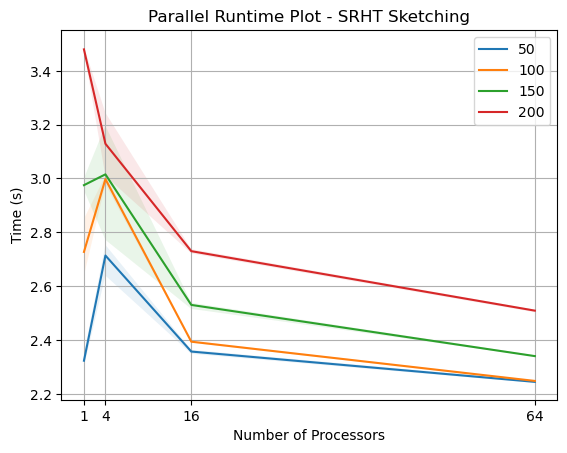

In [11]:
plt.plot([1, 4, 16, 64], [Exp_1_50_S_mean, Exp_4_50_S_mean, Exp_16_50_S_mean, Exp_64_50_S_mean], label="50")
plt.plot([1, 4, 16, 64], [Exp_1_100_S_mean, Exp_4_100_S_mean, Exp_16_100_S_mean, Exp_64_100_S_mean], label="100")
plt.plot([1, 4, 16, 64], [Exp_1_150_S_mean, Exp_4_150_S_mean, Exp_16_150_S_mean, Exp_64_150_S_mean], label="150")
plt.plot([1, 4, 16, 64], [Exp_1_200_S_mean, Exp_4_200_S_mean, Exp_16_200_S_mean, Exp_64_200_S_mean], label="200")

plt.fill_between([1, 4, 16, 64], [Exp_1_50_S_min, Exp_4_50_S_min, Exp_16_50_S_min, Exp_64_50_S_min], [Exp_1_50_S_max, Exp_4_50_S_max, Exp_16_50_S_max, Exp_64_50_S_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Exp_1_100_S_min, Exp_4_100_S_min, Exp_16_100_S_min, Exp_64_100_S_min], [Exp_1_100_S_max, Exp_4_100_S_max, Exp_16_100_S_max, Exp_64_100_S_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Exp_1_150_S_min, Exp_4_150_S_min, Exp_16_150_S_min, Exp_64_150_S_min], [Exp_1_150_S_max, Exp_4_150_S_max, Exp_16_150_S_max, Exp_64_150_S_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Exp_1_200_S_min, Exp_4_200_S_min, Exp_16_200_S_min, Exp_64_200_S_min], [Exp_1_200_S_max, Exp_4_200_S_max, Exp_16_200_S_max, Exp_64_200_S_max], alpha=0.1)

plt.xlabel("Number of Processors")
plt.ylabel("Time (s)")
plt.title("Parallel Runtime Plot - SRHT Sketching")
plt.xticks([1, 4, 16, 64])
plt.grid()
plt.legend()
plt.show()

### Polynomial

In [12]:
Poly_1_50_G = [0.981374323, 0.979226503, 0.978363771]
Poly_1_100_G = [1.127577891, 1.130427943, 1.128370646]
Poly_1_150_G = [1.288635876, 1.284699015, 1.282734085]
Poly_1_200_G = [1.420275596, 1.415334028, 1.41999106]

Poly_4_50_G = [0.837630181, 0.835714245, 0.838080549]
Poly_4_100_G = [0.900955273, 0.902828261, 0.905458216]
Poly_4_150_G = [0.970209381, 0.97361035, 0.973822367]
Poly_4_200_G = [1.031537228, 1.035477804, 1.036653994]

Poly_16_50_G = [0.715785233, 0.713134748, 0.711599858]
Poly_16_100_G = [0.757172767, 0.755077705, 0.7557874]
Poly_16_150_G = [0.801554048, 0.799613487, 0.798560583]
Poly_16_200_G = [0.834574956, 0.835048203, 0.832479013]

Poly_64_50_G = [0.637780682, 0.631349497, 0.628177474]
Poly_64_100_G = [0.652952694, 0.649537332, 0.648087467]
Poly_64_150_G = [0.677462812, 0.675055526, 0.675339674]
Poly_64_200_G = [0.704232092, 0.706933505, 0.706638372]

Poly_1_50_G_mean, Poly_1_50_G_min, Poly_1_50_G_max = np.mean(Poly_1_50_G), min(Poly_1_50_G), max(Poly_1_50_G)
Poly_1_100_G_mean, Poly_1_100_G_min, Poly_1_100_G_max = np.mean(Poly_1_100_G), min(Poly_1_100_G), max(Poly_1_100_G)
Poly_1_150_G_mean, Poly_1_150_G_min, Poly_1_150_G_max = np.mean(Poly_1_150_G), min(Poly_1_150_G), max(Poly_1_150_G)
Poly_1_200_G_mean, Poly_1_200_G_min, Poly_1_200_G_max = np.mean(Poly_1_200_G), min(Poly_1_200_G), max(Poly_1_200_G)

Poly_4_50_G_mean, Poly_4_50_G_min, Poly_4_50_G_max = np.mean(Poly_4_50_G), min(Poly_4_50_G), max(Poly_4_50_G)
Poly_4_100_G_mean, Poly_4_100_G_min, Poly_4_100_G_max = np.mean(Poly_4_100_G), min(Poly_4_100_G), max(Poly_4_100_G)
Poly_4_150_G_mean, Poly_4_150_G_min, Poly_4_150_G_max = np.mean(Poly_4_150_G), min(Poly_4_150_G), max(Poly_4_150_G)
Poly_4_200_G_mean, Poly_4_200_G_min, Poly_4_200_G_max = np.mean(Poly_4_200_G), min(Poly_4_200_G), max(Poly_4_200_G)

Poly_16_50_G_mean, Poly_16_50_G_min, Poly_16_50_G_max = np.mean(Poly_16_50_G), min(Poly_16_50_G), max(Poly_16_50_G)
Poly_16_100_G_mean, Poly_16_100_G_min, Poly_16_100_G_max = np.mean(Poly_16_100_G), min(Poly_16_100_G), max(Poly_16_100_G)
Poly_16_150_G_mean, Poly_16_150_G_min, Poly_16_150_G_max = np.mean(Poly_16_150_G), min(Poly_16_150_G), max(Poly_16_150_G)
Poly_16_200_G_mean, Poly_16_200_G_min, Poly_16_200_G_max = np.mean(Poly_16_200_G), min(Poly_16_200_G), max(Poly_16_200_G)

Poly_64_50_G_mean, Poly_64_50_G_min, Poly_64_50_G_max = np.mean(Poly_64_50_G), min(Poly_64_50_G), max(Poly_64_50_G)
Poly_64_100_G_mean, Poly_64_100_G_min, Poly_64_100_G_max = np.mean(Poly_64_100_G), min(Poly_64_100_G), max(Poly_64_100_G)
Poly_64_150_G_mean, Poly_64_150_G_min, Poly_64_150_G_max = np.mean(Poly_64_150_G), min(Poly_64_150_G), max(Poly_64_150_G)
Poly_64_200_G_mean, Poly_64_200_G_min, Poly_64_200_G_max = np.mean(Poly_64_200_G), min(Poly_64_200_G), max(Poly_64_200_G)

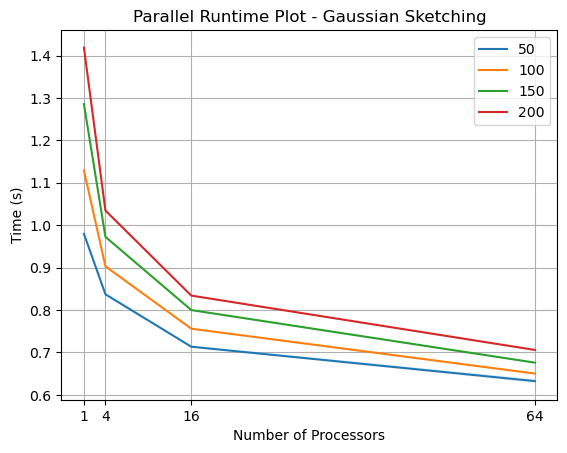

In [13]:
plt.plot([1, 4, 16, 64], [Poly_1_50_G_mean, Poly_4_50_G_mean, Poly_16_50_G_mean, Poly_64_50_G_mean], label="50")
plt.plot([1, 4, 16, 64], [Poly_1_100_G_mean, Poly_4_100_G_mean, Poly_16_100_G_mean, Poly_64_100_G_mean], label="100")
plt.plot([1, 4, 16, 64], [Poly_1_150_G_mean, Poly_4_150_G_mean, Poly_16_150_G_mean, Poly_64_150_G_mean], label="150")
plt.plot([1, 4, 16, 64], [Poly_1_200_G_mean, Poly_4_200_G_mean, Poly_16_200_G_mean, Poly_64_200_G_mean], label="200")

plt.fill_between([1, 4, 16, 64], [Poly_1_50_G_min, Poly_4_50_G_min, Poly_16_50_G_min, Poly_64_50_G_min], [Poly_1_50_G_max, Poly_4_50_G_max, Poly_16_50_G_max, Poly_64_50_G_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Poly_1_100_G_min, Poly_4_100_G_min, Poly_16_100_G_min, Poly_64_100_G_min], [Poly_1_100_G_max, Poly_4_100_G_max, Poly_16_100_G_max, Poly_64_100_G_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Poly_1_150_G_min, Poly_4_150_G_min, Poly_16_150_G_min, Poly_64_150_G_min], [Poly_1_150_G_max, Poly_4_150_G_max, Poly_16_150_G_max, Poly_64_150_G_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Poly_1_200_G_min, Poly_4_200_G_min, Poly_16_200_G_min, Poly_64_200_G_min], [Poly_1_200_G_max, Poly_4_200_G_max, Poly_16_200_G_max, Poly_64_200_G_max], alpha=0.1)

plt.xlabel("Number of Processors")
plt.ylabel("Time (s)")
plt.title("Parallel Runtime Plot - Gaussian Sketching")
plt.xticks([1, 4, 16, 64])
plt.grid()
plt.legend()
plt.show()

In [14]:
Poly_1_50_S = [1.413036644, 1.405891217, 1.413647079]
Poly_1_100_S = [1.681330691, 1.677835072, 1.683759861]
Poly_1_150_S = [1.973498526, 1.967263147, 1.963675799]
Poly_1_200_S = [2.255350065, 2.253688823, 2.251544221]

Poly_4_50_S = [0.981392217, 0.9787479, 0.983264907]
Poly_4_100_S = [1.084937619, 1.080802651, 1.080167117]
Poly_4_150_S = [1.19220563, 1.189030913, 1.188157088]
Poly_4_200_S = [1.297614568, 1.298716052, 1.296828198]

Poly_16_50_S = [0.811609425, 0.807940407, 0.804335416]
Poly_16_100_S = [0.854369201, 0.852985831, 0.854707997]
Poly_16_150_S = [0.9168573, 0.944276538, 0.912016909]
Poly_16_200_S = [0.970461229, 0.966578857, 0.972445441]

Poly_64_50_S = [0.701201364, 0.697026448, 0.706197936]
Poly_64_100_S = [0.726344344, 0.722597806, 0.738157674]
Poly_64_150_S = [0.75809307, 0.773865908, 0.7806088400]
Poly_64_200_S = [0.795059311, 0.792927111, 0.794555255]

Poly_1_50_S_mean, Poly_1_50_S_min, Poly_1_50_S_max = np.mean(Poly_1_50_S), min(Poly_1_50_S), max(Poly_1_50_S)
Poly_1_100_S_mean, Poly_1_100_S_min, Poly_1_100_S_max = np.mean(Poly_1_100_S), min(Poly_1_100_S), max(Poly_1_100_S)
Poly_1_150_S_mean, Poly_1_150_S_min, Poly_1_150_S_max = np.mean(Poly_1_150_S), min(Poly_1_150_S), max(Poly_1_150_S)
Poly_1_200_S_mean, Poly_1_200_S_min, Poly_1_200_S_max = np.mean(Poly_1_200_S), min(Poly_1_200_S), max(Poly_1_200_S)

Poly_4_50_S_mean, Poly_4_50_S_min, Poly_4_50_S_max = np.mean(Poly_4_50_S), min(Poly_4_50_S), max(Poly_4_50_S)
Poly_4_100_S_mean, Poly_4_100_S_min, Poly_4_100_S_max = np.mean(Poly_4_100_S), min(Poly_4_100_S), max(Poly_4_100_S)
Poly_4_150_S_mean, Poly_4_150_S_min, Poly_4_150_S_max = np.mean(Poly_4_150_S), min(Poly_4_150_S), max(Poly_4_150_S)
Poly_4_200_S_mean, Poly_4_200_S_min, Poly_4_200_S_max = np.mean(Poly_4_200_S), min(Poly_4_200_S), max(Poly_4_200_S)

Poly_16_50_S_mean, Poly_16_50_S_min, Poly_16_50_S_max = np.mean(Poly_16_50_S), min(Poly_16_50_S), max(Poly_16_50_S)
Poly_16_100_S_mean, Poly_16_100_S_min, Poly_16_100_S_max = np.mean(Poly_16_100_S), min(Poly_16_100_S), max(Poly_16_100_S)
Poly_16_150_S_mean, Poly_16_150_S_min, Poly_16_150_S_max = np.mean(Poly_16_150_S), min(Poly_16_150_S), max(Poly_16_150_S)
Poly_16_200_S_mean, Poly_16_200_S_min, Poly_16_200_S_max = np.mean(Poly_16_200_S), min(Poly_16_200_S), max(Poly_16_200_S)

Poly_64_50_S_mean, Poly_64_50_S_min, Poly_64_50_S_max = np.mean(Poly_64_50_S), min(Poly_64_50_S), max(Poly_64_50_S)
Poly_64_100_S_mean, Poly_64_100_S_min, Poly_64_100_S_max = np.mean(Poly_64_100_S), min(Poly_64_100_S), max(Poly_64_100_S)
Poly_64_150_S_mean, Poly_64_150_S_min, Poly_64_150_S_max = np.mean(Poly_64_150_S), min(Poly_64_150_S), max(Poly_64_150_S)
Poly_64_200_S_mean, Poly_64_200_S_min, Poly_64_200_S_max = np.mean(Poly_64_200_S), min(Poly_64_200_S), max(Poly_64_200_S)

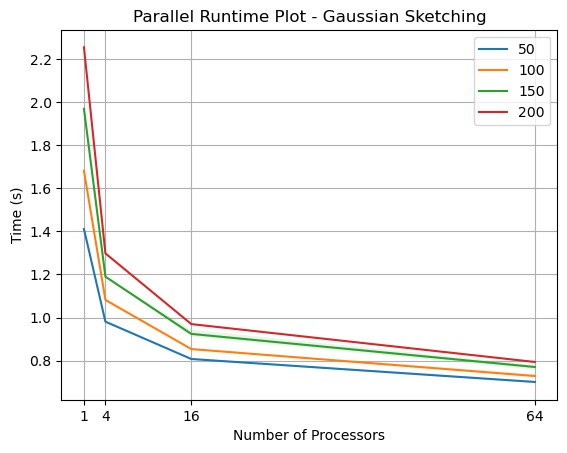

In [15]:
plt.plot([1, 4, 16, 64], [Poly_1_50_S_mean, Poly_4_50_S_mean, Poly_16_50_S_mean, Poly_64_50_S_mean], label="50")
plt.plot([1, 4, 16, 64], [Poly_1_100_S_mean, Poly_4_100_S_mean, Poly_16_100_S_mean, Poly_64_100_S_mean], label="100")
plt.plot([1, 4, 16, 64], [Poly_1_150_S_mean, Poly_4_150_S_mean, Poly_16_150_S_mean, Poly_64_150_S_mean], label="150")
plt.plot([1, 4, 16, 64], [Poly_1_200_S_mean, Poly_4_200_S_mean, Poly_16_200_S_mean, Poly_64_200_S_mean], label="200")

plt.fill_between([1, 4, 16, 64], [Poly_1_50_S_min, Poly_4_50_S_min, Poly_16_50_S_min, Poly_64_50_S_min], [Poly_1_50_S_max, Poly_4_50_S_max, Poly_16_50_S_max, Poly_64_50_S_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Poly_1_100_S_min, Poly_4_100_S_min, Poly_16_100_S_min, Poly_64_100_S_min], [Poly_1_100_S_max, Poly_4_100_S_max, Poly_16_100_S_max, Poly_64_100_S_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Poly_1_150_S_min, Poly_4_150_S_min, Poly_16_150_S_min, Poly_64_150_S_min], [Poly_1_150_S_max, Poly_4_150_S_max, Poly_16_150_S_max, Poly_64_150_S_max], alpha=0.1)
plt.fill_between([1, 4, 16, 64], [Poly_1_200_S_min, Poly_4_200_S_min, Poly_16_200_S_min, Poly_64_200_S_min], [Poly_1_200_S_max, Poly_4_200_S_max, Poly_16_200_S_max, Poly_64_200_S_max], alpha=0.1)

plt.xlabel("Number of Processors")
plt.ylabel("Time (s)")
plt.title("Parallel Runtime Plot - Gaussian Sketching")
plt.xticks([1, 4, 16, 64])
plt.grid()
plt.legend()
plt.show()